C:\Users\HRISHITA\AppData\Local\Temp\ipykernel_3908\252455209.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Fremont_Bridge_Bicycle.csv', parse_dates=['Date'])


                 Date  Fremont Bridge Sidewalks, south of N 34th St  \
0 2012-10-02 13:00:00                                          55.0   
1 2012-10-02 14:00:00                                         130.0   
2 2012-10-02 15:00:00                                         152.0   
3 2012-10-02 16:00:00                                         278.0   
4 2012-10-02 17:00:00                                         563.0   

   Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk  \
0                                                7.0                    
1                                               55.0                    
2                                               81.0                    
3                                              167.0                    
4                                              393.0                    

   Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk  
0                                               48.0          

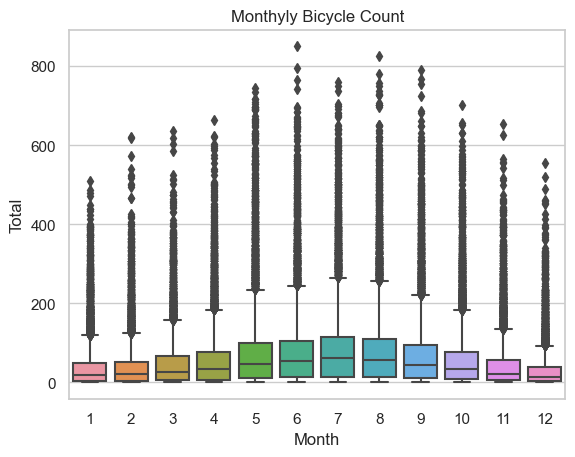

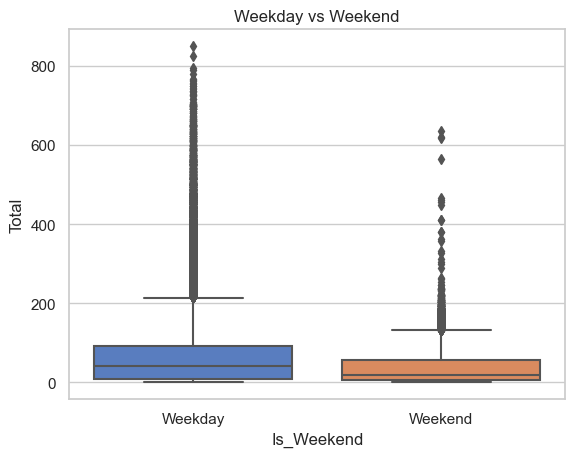

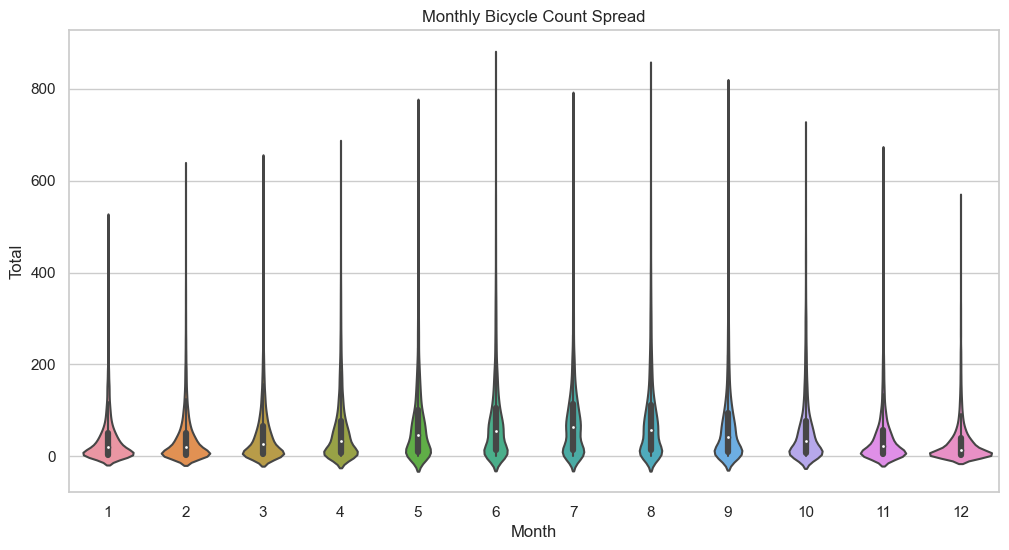

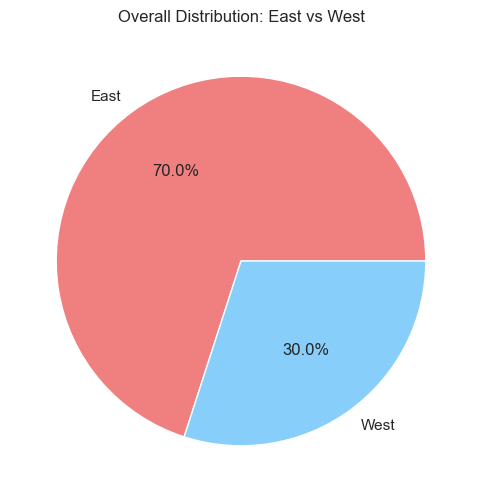

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('Fremont_Bridge_Bicycle.csv', parse_dates=['Date'])

print(df.head())
print(df.info())

df.columns=['Date', 'East', 'West', 'Total']
df.fillna(0, inplace=True)

df['Year']= df['Date'].dt.year
df['Month']= df['Date'].dt.month
df['Day']= df['Date'].dt.day
df['Weekday']= df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour
df['Is_Weekend'] = df['Weekday'].isin(['Saturday', 'Sunday'])

sns.set(style= 'whitegrid', palette= 'muted')

sns.boxplot(x='Month', y='Total', data=df)
plt.title("Monthyly Bicycle Count")
plt.show()

sns.boxplot(x='Is_Weekend', y='Total', data=df)
plt.xticks([0,1], ['Weekday', 'Weekend'])
plt.title('Weekday vs Weekend'); plt.show()

plt.figure(figsize=(12,6))
sns.violinplot(x='Month', y='Total', data=df)
plt.title('Monthly Bicycle Count Spread'); plt.show()

totals = df[['East', 'West']].sum()
plt.figure(figsize=(6,6))
plt.pie(totals, labels=['East', 'West'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Overall Distribution: East vs West'); plt.show()